In [5]:
import numpy as np
import scipy.io
import os
import sys
import matplotlib.pyplot as plt

NameError: name 't' is not defined

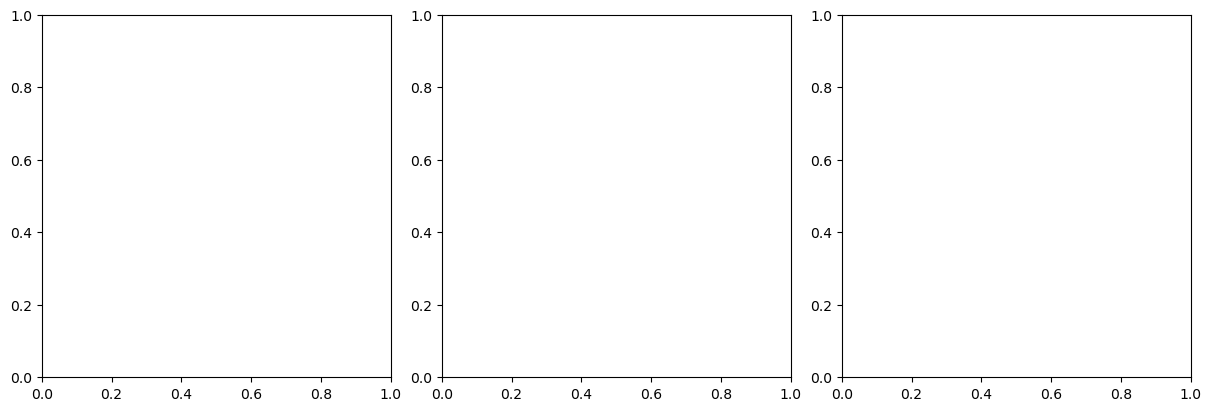

In [6]:
def CSCEA490_HW_ERP(pNum):
    """
    This function loads one or more preprocessed ERP datasets, computes the category-level averaged ERPs,
    and generates the following plots:
    - Per-category temporally resolved voltage topomaps.
    - Per-category ERPs for selected electrodes.
    - Within-category single-image ERPs for Human Face and Inanimate Object categories.

    Parameters:
    pNum (int or list): The participant number to be analyzed. Enter numbers between 1 and 10 to plot data from a specific participant, or 0 to plot data from all participants.

    Returns:
    None: The function saves a number of figures in the Figure directory.
    """
    "-------------------"
    print("\033[H\033[J")
    print("- * - * - * - * Beginning function call * - * - * - * -\n")
    # Make sure a number was entered
    if not isinstance(pNum, int):
        raise ValueError('The function requires one input (the participant number)')
    # Add to path all files and folders in the parent directory of "Code"
    parent_dir = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
    sys.path.append(parent_dir)
    # Time windows and labels -- not using right now
    tWinIdx = np.tile(np.arange(1, 7), (11, 1)) + np.tile(np.arange(-6, 25, 3).reshape(-1, 1), (1, 6)) + 7
    tWinLabel = ['-96 to -16 msec', '-48 to 32 msec', '0 to 80 msec', 
                 '48 to 128 msec', '96 to 176 msec', '144 to 224 msec', 
                 '192 to 272 msec', '240 to 320 msec', '288 to 368 msec', 
                 '336 to 416 msec', '384 to 464 msec']
    # Colour palette
    colors = scipy.io.loadmat('colors.mat')
    rgb10 = colors['rgb10']
    rgb10 = np.delete(rgb10, [5, 6, 7], axis=0) #Force used colors to align with category numbering
    # Category labels
    cStr = ['HB', 'HF', 'AB', 'AF', 'FV', 'IO']
    "-------------------"
    # Analysis 0: Load the data and print some information about it.
    plt.close('all')
    X = np.empty((0, 0, 0))
    labels6 = np.array([])
    labels72 = np.array([])
    # If 0 was entered, update pNum to include all 10 files
    if pNum == 0:
        print('Using all 10 files!')
        pNum = range(1, 11)
    elif isinstance(pNum, int):
        pNum = [pNum]
    # Iterate through all values of pNum: Load each associated file and aggregate the data (X) and stim labels (labels6, labels72).
    for i in pNum:

    # Load the data and print information in console
        pStr = f'{i:02d}'
        baseFn = f'S{pStr}'
        IN = scipy.io.loadmat("./Data/"+f'{baseFn}.mat')

        print(f'Participant number: {i}')
        print(f'Loaded input file {baseFn}')
        print(f"Size of data matrix (electrodes x time x trials): {IN['X'].shape}")
        print(f"Number of time samples per second (sampling rate): {IN['fs'][0][0]} Hz")
        print(f"Trial epoch: {IN['t'][0][0]} to {IN['t'][0][-1]} msec relative to stimulus onset.")
        print(IN)  # Display the struct
        # Aggregate data from multiple files and/or move out of struct fields into standalone variables.
        if X.size == 0: #EEG data
            X = IN['X']
        else:
            X = np.concatenate((X, IN['X']), axis=2)
        labels6 = np.concatenate((labels6, IN['labels6'].flatten())) # 6-class labels
        labels72 = np.concatenate((labels72, IN['labels72'].flatten())) # 72-class labels
        if 't' not in locals(): # Time axis (do only once)
            t = IN['t'].flatten()
    # Separate the trials by category and compute category means and iterate through the categories and store in 4D matrix
    XCat = np.zeros((X.shape[0], X.shape[1], X.shape[2], 6))
    for i in range(1, 7):
        XCat[:, :, :, i-1] = X[:, :, labels6 == i] #[space x time x trial x category]
    # Category-level means (averaged across the trial dimension)
    XCatMean = np.mean(XCat, axis=2) #[space x time x category]
    "-------------------"
    # Write here because "pass" has to be at the bottom I think
    "-------------------"
    # Placeholder for further processing and plotting (this has to be at the bottom of the code I think, so write above it)
    pass

# Sample data
# These should be defined or loaded from your data source
# t = np.linspace(-100, 800, 1000)  # Example time vector
# XCatMean = np.random.randn(128, 1000, 6)  # Example ERP data
# rgb10 = plt.cm.tab10.colors  # Example colors
# cStr = ['Category1', 'Category2', 'Category3', 'Category4', 'Category5', 'Category6']  # Example category names
# pNum = 1  # Example participant number

# Which electrodes to use
eUse = [58, 75, 96]
nElectrodes = len(eUse)

fig, axs = plt.subplots(1, nElectrodes, figsize=(12, 4), constrained_layout=True)

yl = []

# Iterate through the selected electrodes (one sub-plot per electrode)
for i in range(nElectrodes):
    ax = axs[i]
    # ax.hold(True)
    
    # Iterate through the stimulus categories (one line plot per category)
    for j in range(6):
        ax.plot(t, XCatMean[eUse[i], :, j], color=rgb10[j], linewidth=1, label=cStr[j])
    
    yl.append(ax.get_ylim())  # Save the ylim so we can set all to max later
    
    ax.set_title(f'Electrode {eUse[i]}')
    ax.grid(True)
    ax.set_xlabel('Time (msec)')
    ax.set_ylabel('Voltage (μV)')
    ax.legend(loc='best')
    # ax.hold(False)

# Iterate back through the sub-plots and standardize the ylim across plots
absMaxYl = max(abs(np.array(yl).flatten()))
for ax in axs:
    ax.set_ylim([-absMaxYl, absMaxYl])

fig.suptitle(f'Participant {pNum}')

# Save out the ERP figure
fig.savefig('../Figures/allSubs_1_allCategoryERPs.png', dpi=300)
plt.close(fig)

print(f'~ * Saved allSubs_1_allCategoryERPs.png * ~')

def plotOnEgi129_NG(data, threshold):
    # Example implementation for plotting on EGI 129 layout
    fig, ax = plt.subplots()
    # Assuming data has been reshaped to match the electrode layout
    im = ax.imshow(data.reshape(11, 12), cmap='coolwarm')  # Adjust reshape dimensions as needed
    ax.set_title('EGI 129 Layout Plot')
    plt.colorbar(im, ax=ax)
    plt.show()

def jmaColors(palette_name):
    # Example implementation for colormap retrieval
    if palette_name == 'coolhotcortex':
        return plt.cm.coolwarm  # Replace with the actual colormap you want to use
    else:
        return plt.cm.viridis  # Default colormap

def analysis_2_P1_N170_topoplots(XCatMean, baseFn, pNum):
    tUse = [14, np.argmin(XCatMean[95, :, 1])]
    tStr = ['P1', 'N170']
    cStr = ['Human Body', 'Human Face', 'Animal Body', 'Animal Face', 'Fruit Vegetable', 'Inanimate Object']
    fSize = 16

    for cc in range(6):
        fig, axs = plt.subplots(1, len(tUse), figsize=(10, 5), constrained_layout=True)
        aggrMin = []
        aggrMax = []

        for tt, ax in enumerate(axs):
            thisData = XCatMean[:, tUse[tt], cc]
            thisDataPlot = np.append(thisData, [np.nan]*4)  # Assuming the data is reshaped to fit EGI 129 layout
            plotOnEgi129_NG(thisDataPlot, 0.1)  # Placeholder for actual plotting
            im = ax.imshow(thisDataPlot.reshape(13, 10), cmap=jmaColors('coolhotcortex'))  # Adjust reshape accordingly

            aggrMin.append(np.min(thisData))
            aggrMax.append(np.max(thisData))
            ax.set_title(tStr[tt])
            ax.axis('off')

        absScale = max(-min(aggrMin), max(aggrMax))

        for ax in axs:
            im.set_clim(-absScale, absScale)
            ax.tick_params(labelsize=fSize)

        plt.colorbar(im, ax=axs, shrink=0.8)
        fig.suptitle(f'Category {cc+1}: {cStr[cc]}', fontsize=fSize)
        plt.show()

    fLabel = ['1_HB', '2_HF', '3_AB', '4_AF', '5_FV', '6_IO']

    for i in range(6):
        fig = plt.figure(i + 1)
        if len(pNum) > 1:
            baseFn = 'allSubs'
        fnOut = f'{baseFn}_2_P1N170Topo_category_{fLabel[i]}.png'
        fig.savefig(os.path.join('..', 'Figures', fnOut))
        plt.close(fig)

    print(' ')

In [ ]:
# Example call assuming XCatMean, baseFn, and pNum are already defined:
# analysis_2_P1_N170_topoplots(XCatMean, baseFn, pNum)

# Assuming X, labels72, t, rgb10, eUse, and pNum are defined appropriately

# Initialize empty lists for faces (XHF) and objects (XIO)
XHF = []
XIO = []

# Select exemplar number to use
eUse = 96

# Organize exemplar-level ERPs for Human Faces (HF)
for i in range(13, 25):  # MATLAB: for i = 13:24
    XHF.append(X[:, :, np.where(labels72 == i)[0]])  # space x time x trials x exemplar
XHFMean = np.mean(np.squeeze(np.array(XHF), axis=2), axis=2)

# Organize exemplar-level ERPs for Inanimate Objects (IO)
for i in range(61, 73):  # MATLAB: for i = 61:72
    XIO.append(X[:, :, np.where(labels72 == i)[0]])  # space x time x trials x exemplar
XIOMean = np.mean(np.squeeze(np.array(XIO), axis=2), axis=2)

# Plot the ERPs
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Human Faces
axs[0].plot(t, np.squeeze(XHFMean[eUse, :, :]), color=rgb10[1, :])
axs[0].set(xlabel='Time (msec)', ylabel='Voltage (\u03BCV)',
           title='Human Faces, electrode 96')
axs[0].grid(True)

# Plot for Inanimate Objects
axs[1].plot(t, np.squeeze(XIOMean[eUse, :, :]), color=rgb10[5, :])
axs[1].set(xlabel='Time (msec)', ylabel='Voltage (\u03BCV)',
           title='Inanimate Objects, electrode 96')
axs[1].grid(True)

# Standardize y-limits across subplots
yl = [ax.get_ylim() for ax in axs]
absY = np.max(np.abs(yl))
for ax in axs:
    ax.set_ylim([-absY, absY])

# Save the figure
ww = 12
hh = ww / 3
fig.set_size_inches(ww, hh)
baseFn = 'allSubs' if len(pNum) > 1 else ''
fnOut = f'{baseFn}_3_withinCategoryExemplarERPs.png'
plt.savefig('../Figures/' + fnOut)
plt.close()

print('\n- * - * - * - * Function call complete * - * - * - * -')